<img src="cognorise.png" width="900" height="300">

<img src="Cinema.png" width="900" height="300">

In [1]:
#Importation of packages and libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, RandomForestClassifier # Some classifiers
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split #Cross validation tools, and a train/test split utility
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter search tools
import pickle

In [2]:
#Load the dataset
df=pd.read_csv('cinemaTicket_Ref.csv')
df.head()

film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3        2    5  
4        2    5

In [3]:
df.shape

(142524, 14)

In [4]:
#Verify if there is duplicates
print('We have', df.duplicated().sum(), 'in the dataset')

We have 106 in the dataset


In [5]:
#Let drop the dupicates
df.drop_duplicates(inplace=True)
print('We have', df.duplicated().sum(), 'in the dataset')

We have 0 in the dataset


In [6]:
df.shape

(142418, 14)

In [7]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of         film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
0            1492          304      3900000            26            0   
1            1492          352      3360000            42            0   
2            1492          489      2560000            32            0   
3            1492          429      1200000            12            0   
4            1492          524      1200000            15            0   
...           ...          ...          ...           ...          ...   
142519       1569          495      1320000            22            0   
142520       1569          474      1200000            15            0   
142521       1569          524      1060000             8            0   
142522       1569          529       600000             5            0   
142523       1569          486       250000             5            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity  \
0      

In [9]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

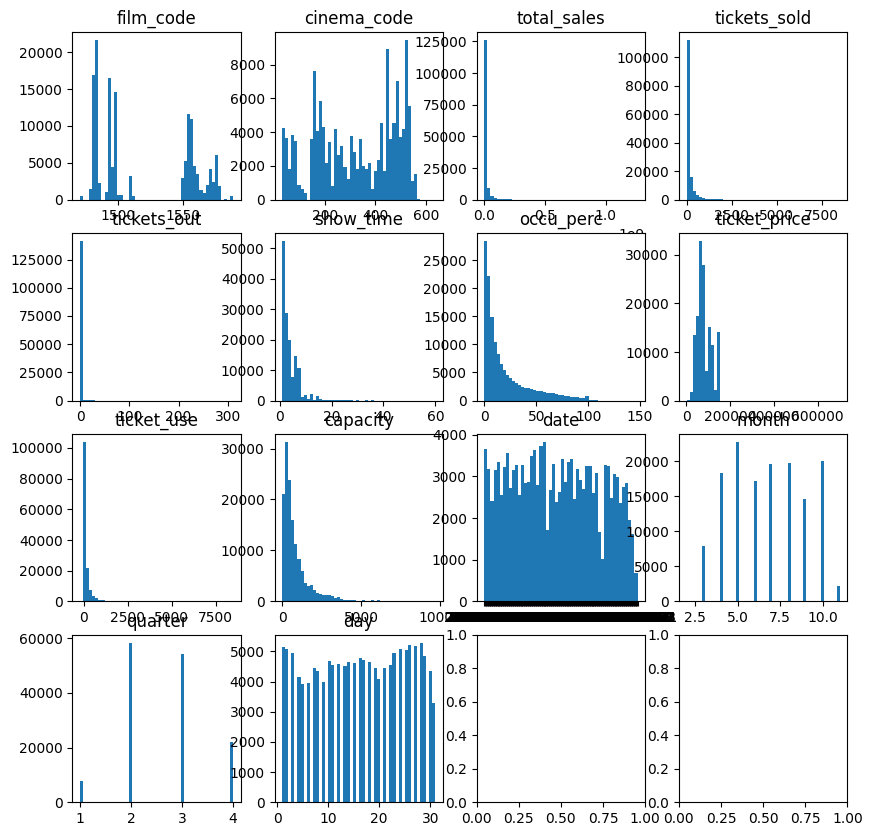

In [10]:
# Visualization of the variables distribution 
fig, axs = plt.subplots(4,4 , figsize=(10, 10))
axs = axs.ravel()
for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)

plt.show()

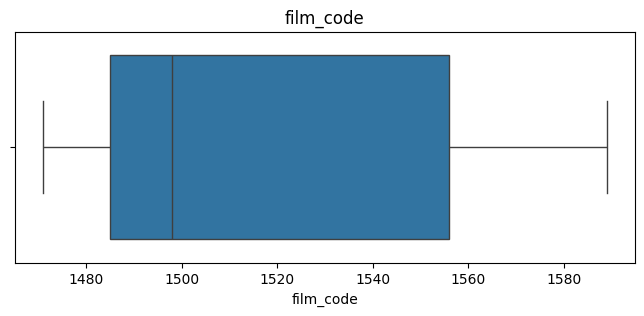

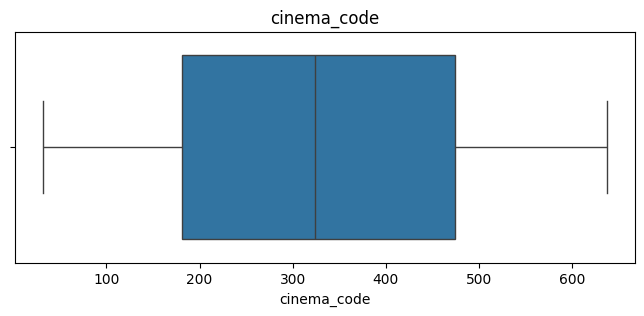

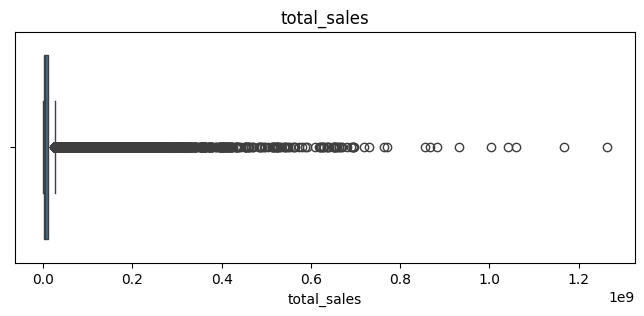

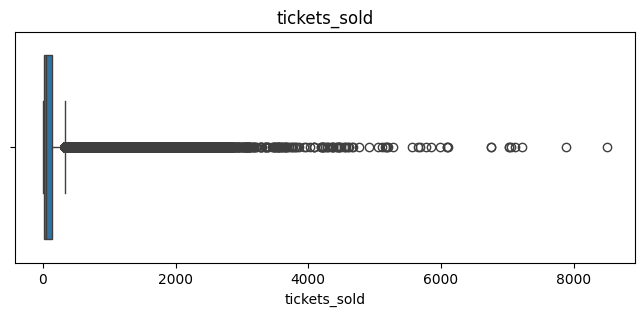

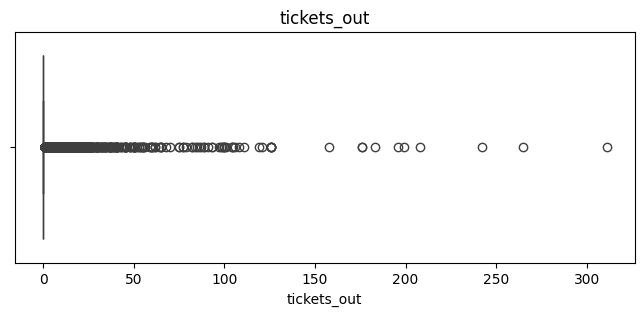

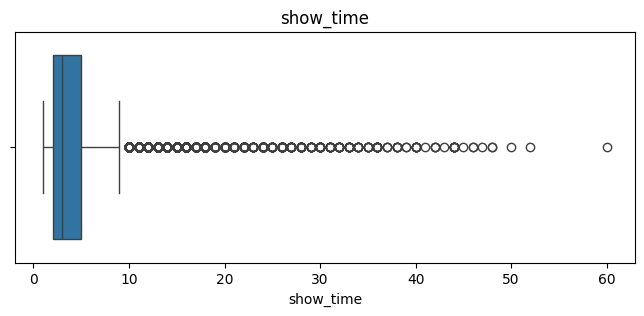

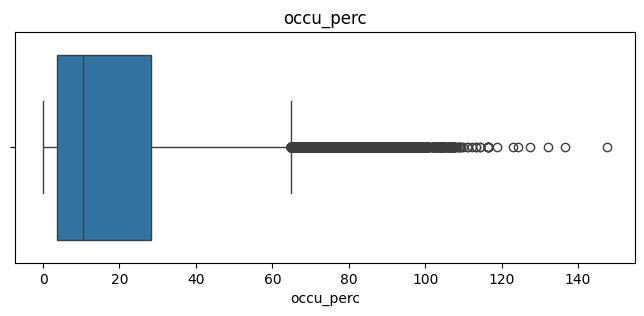

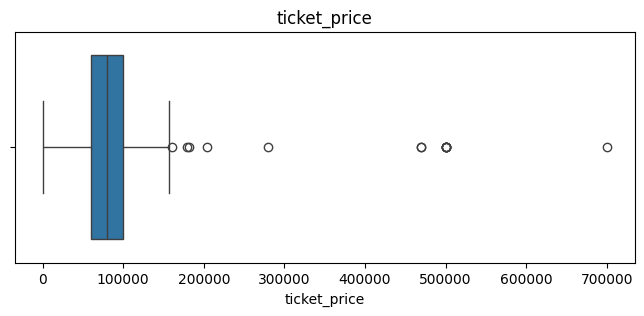

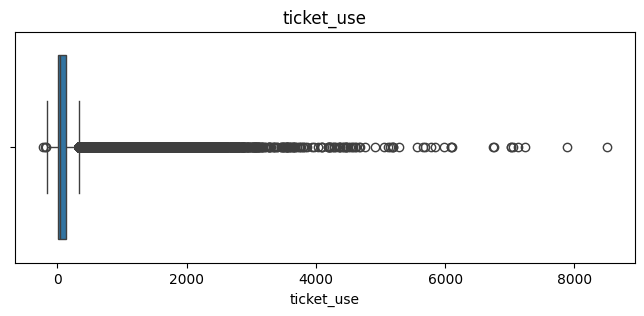

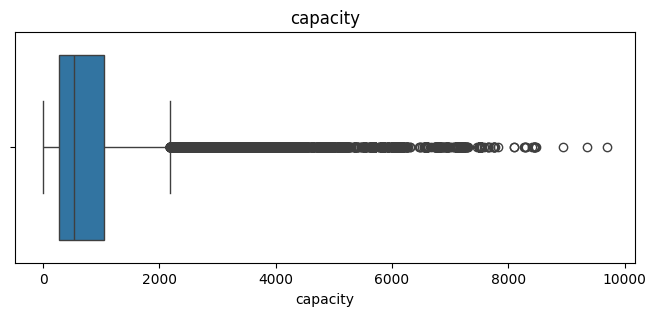

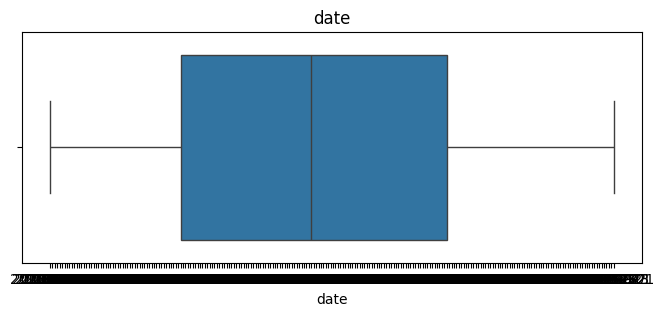

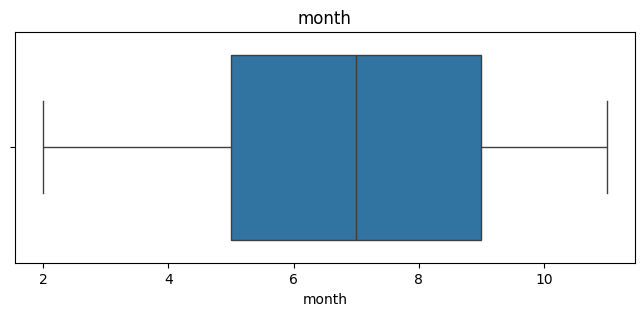

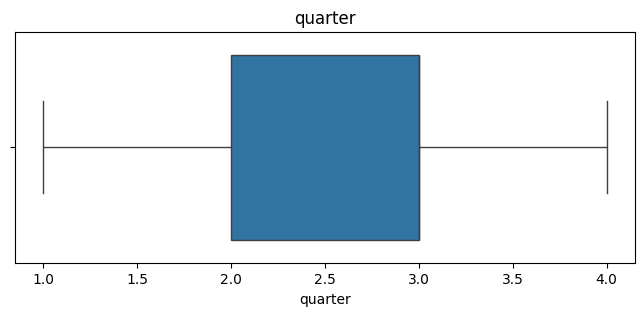

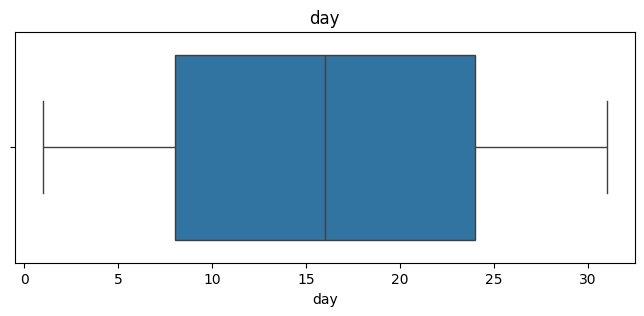

In [11]:
# boxplots for each variabl (to check if is there any outliers)
for column in df.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=df[column], ax=ax)
    plt.title(column)
    plt.show()

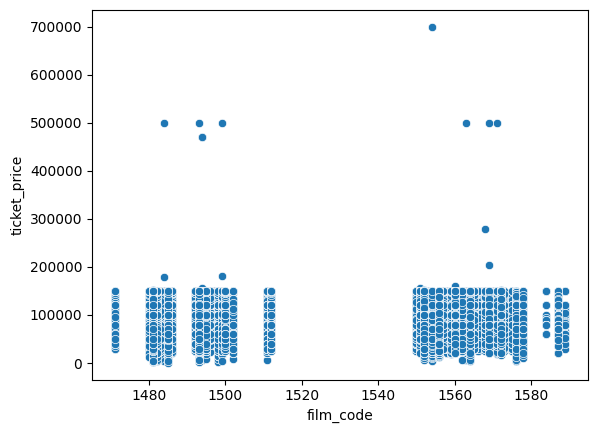

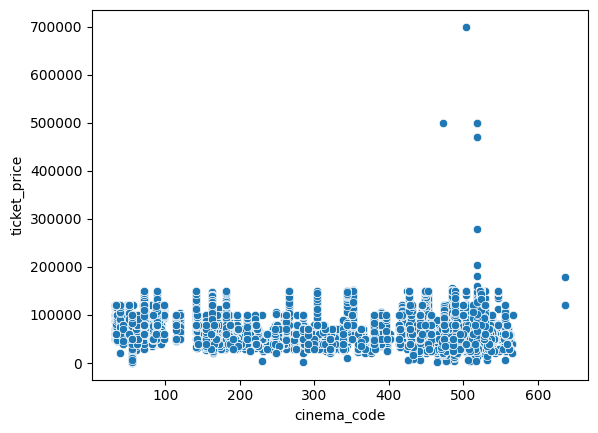

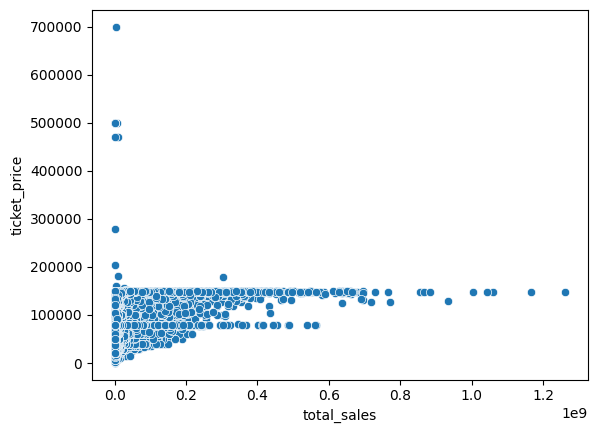

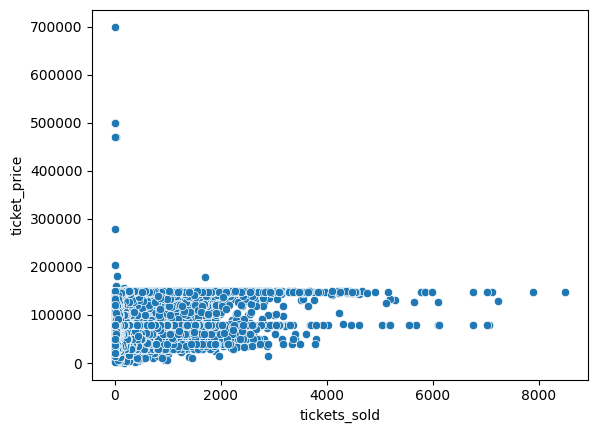

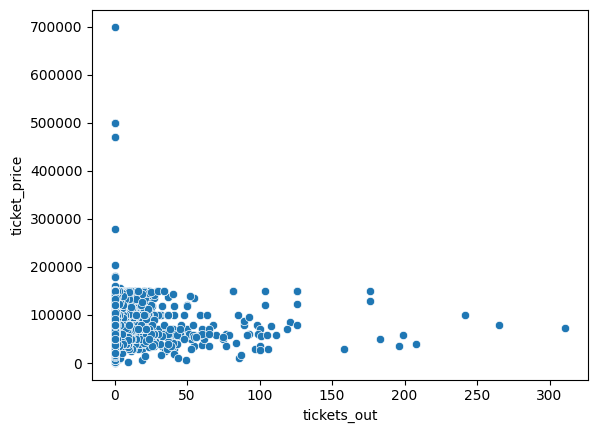

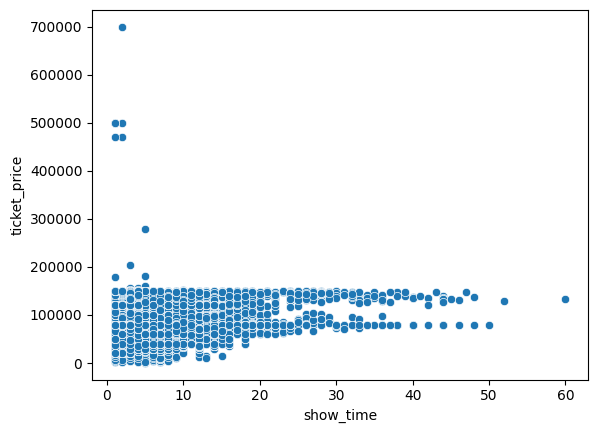

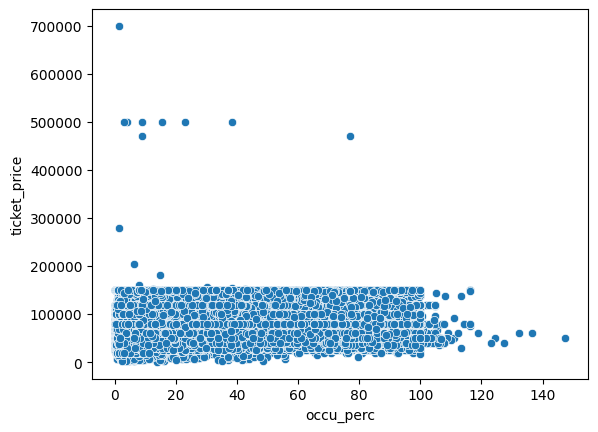

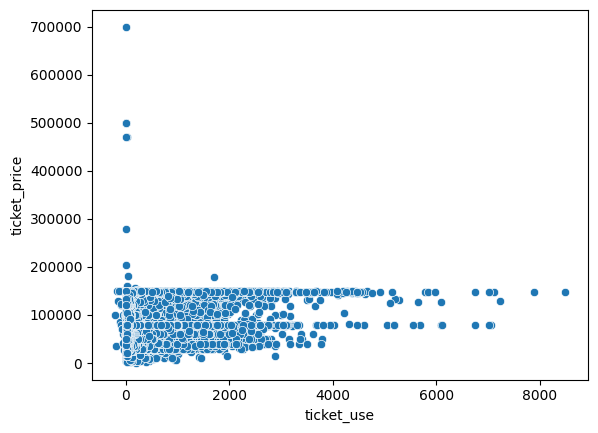

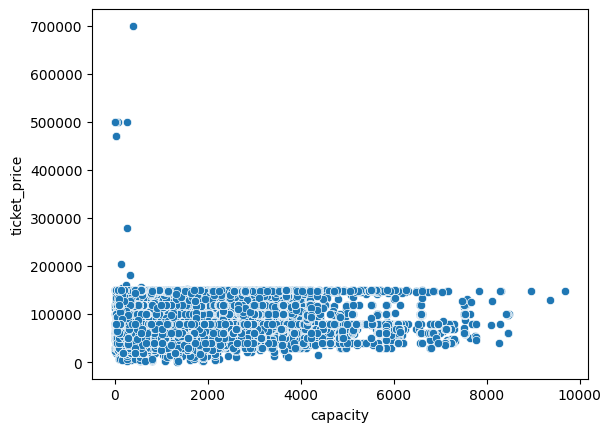

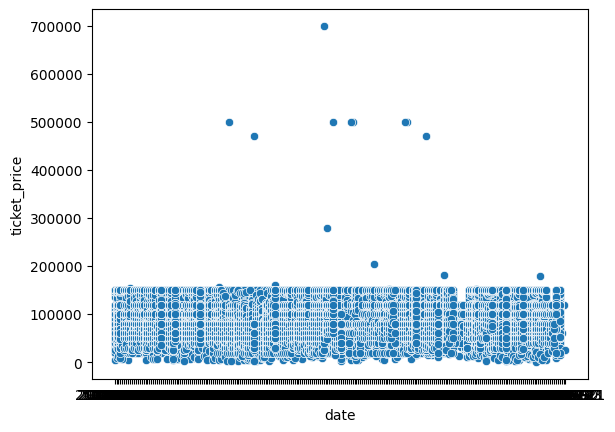

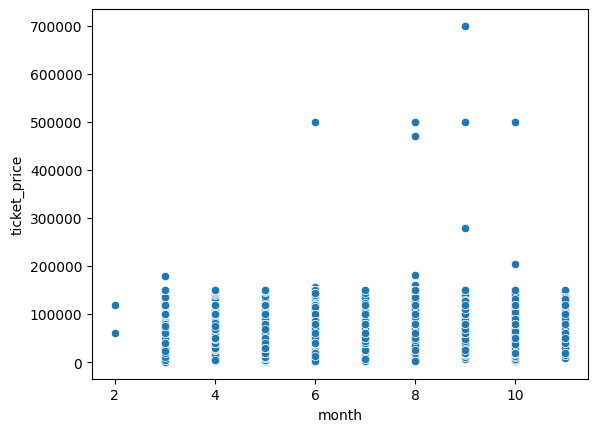

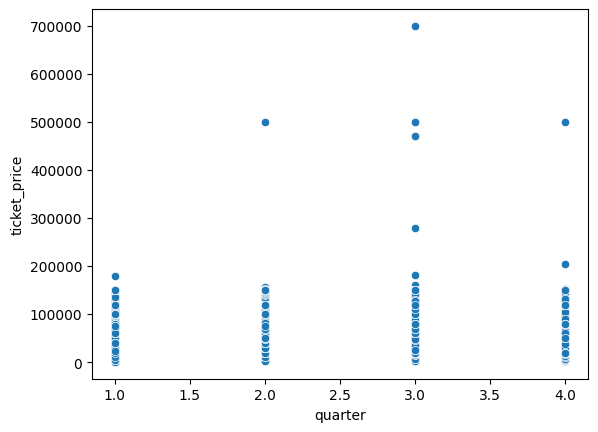

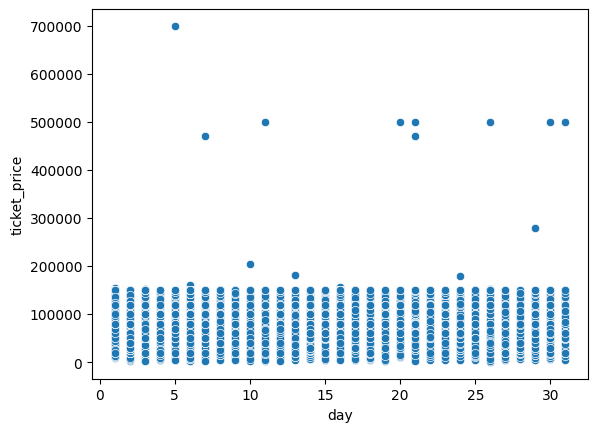

In [12]:
# Extraction des colonnes de variables explicatives
X = df.drop("ticket_price", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=df["ticket_price"])
    plt.show()

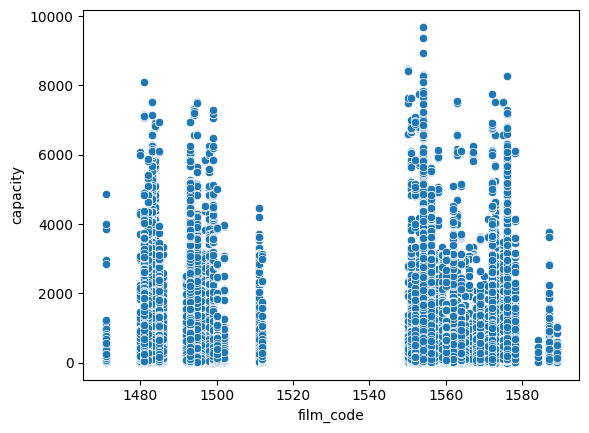

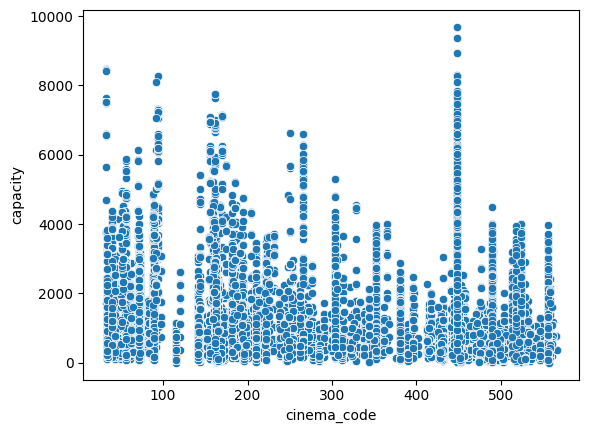

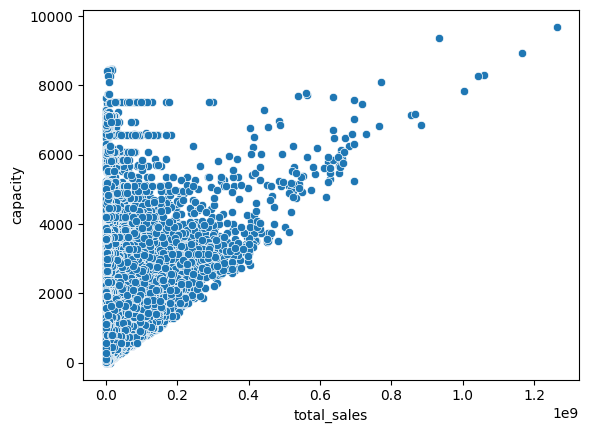

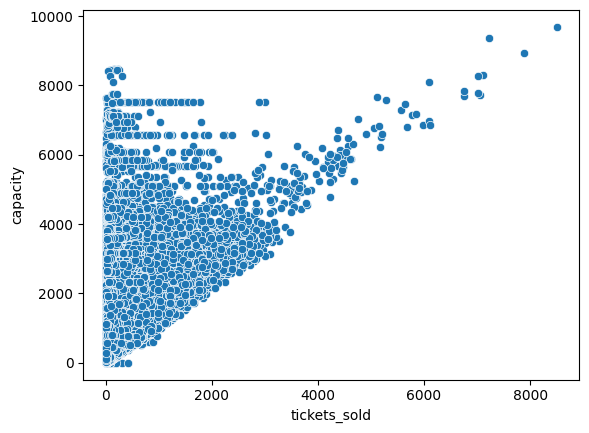

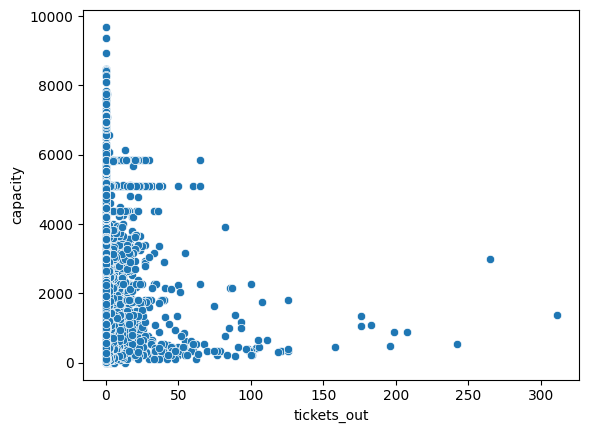

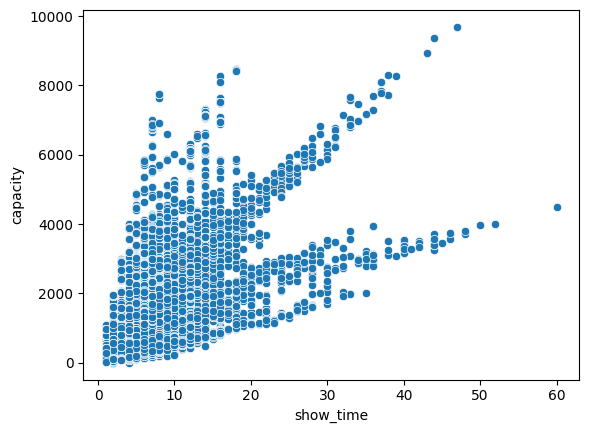

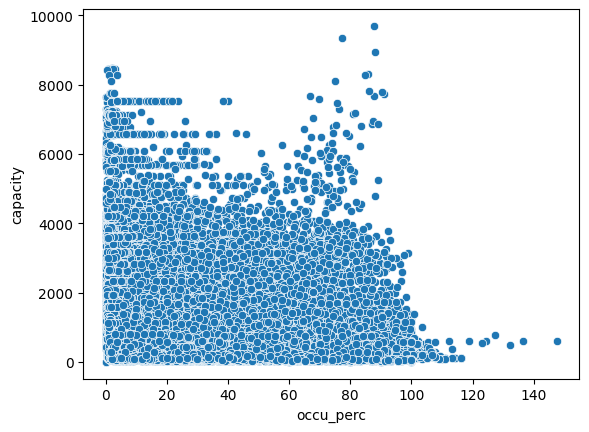

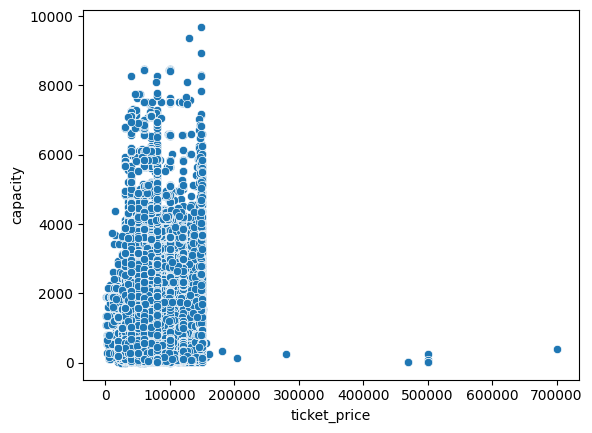

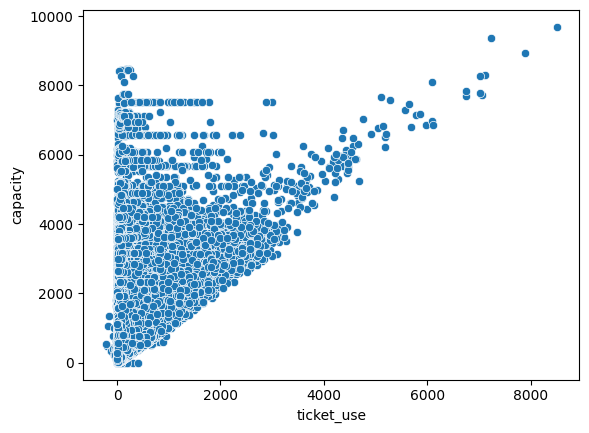

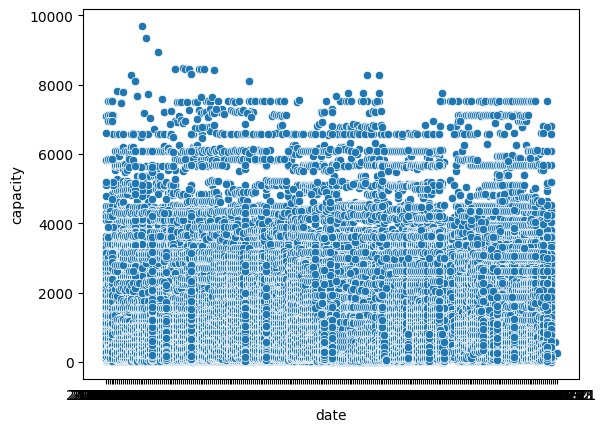

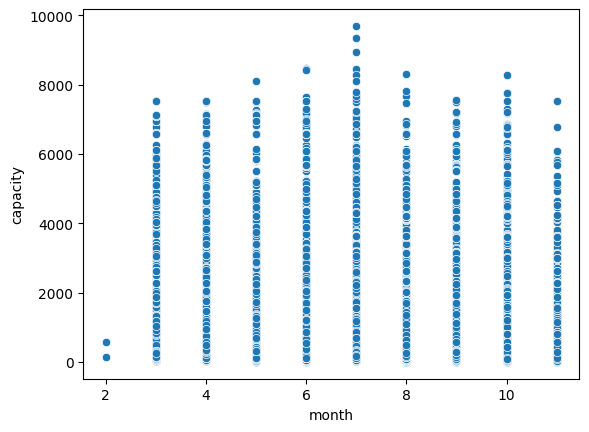

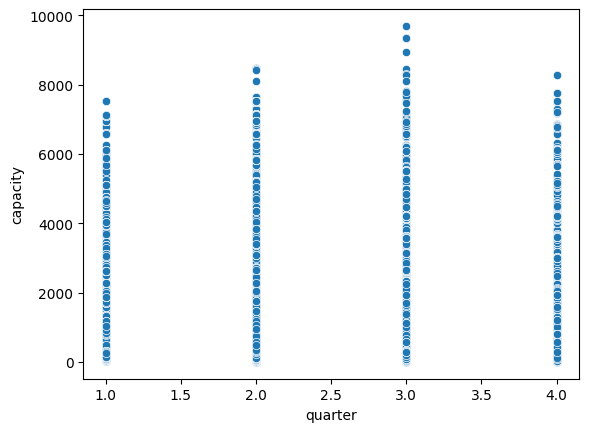

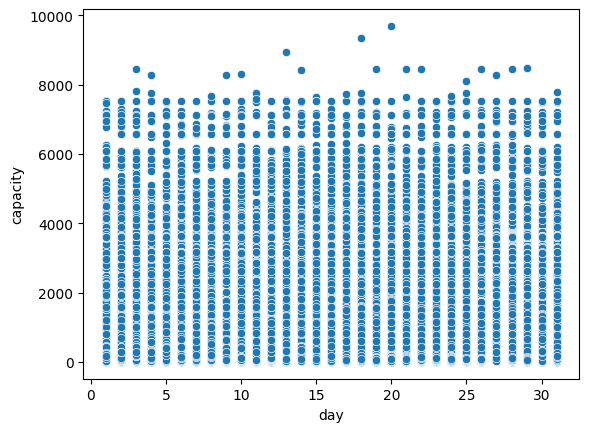

In [13]:
# Extraction des colonnes de variables explicatives
X = df.drop("capacity", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=df["capacity"])
    plt.show()

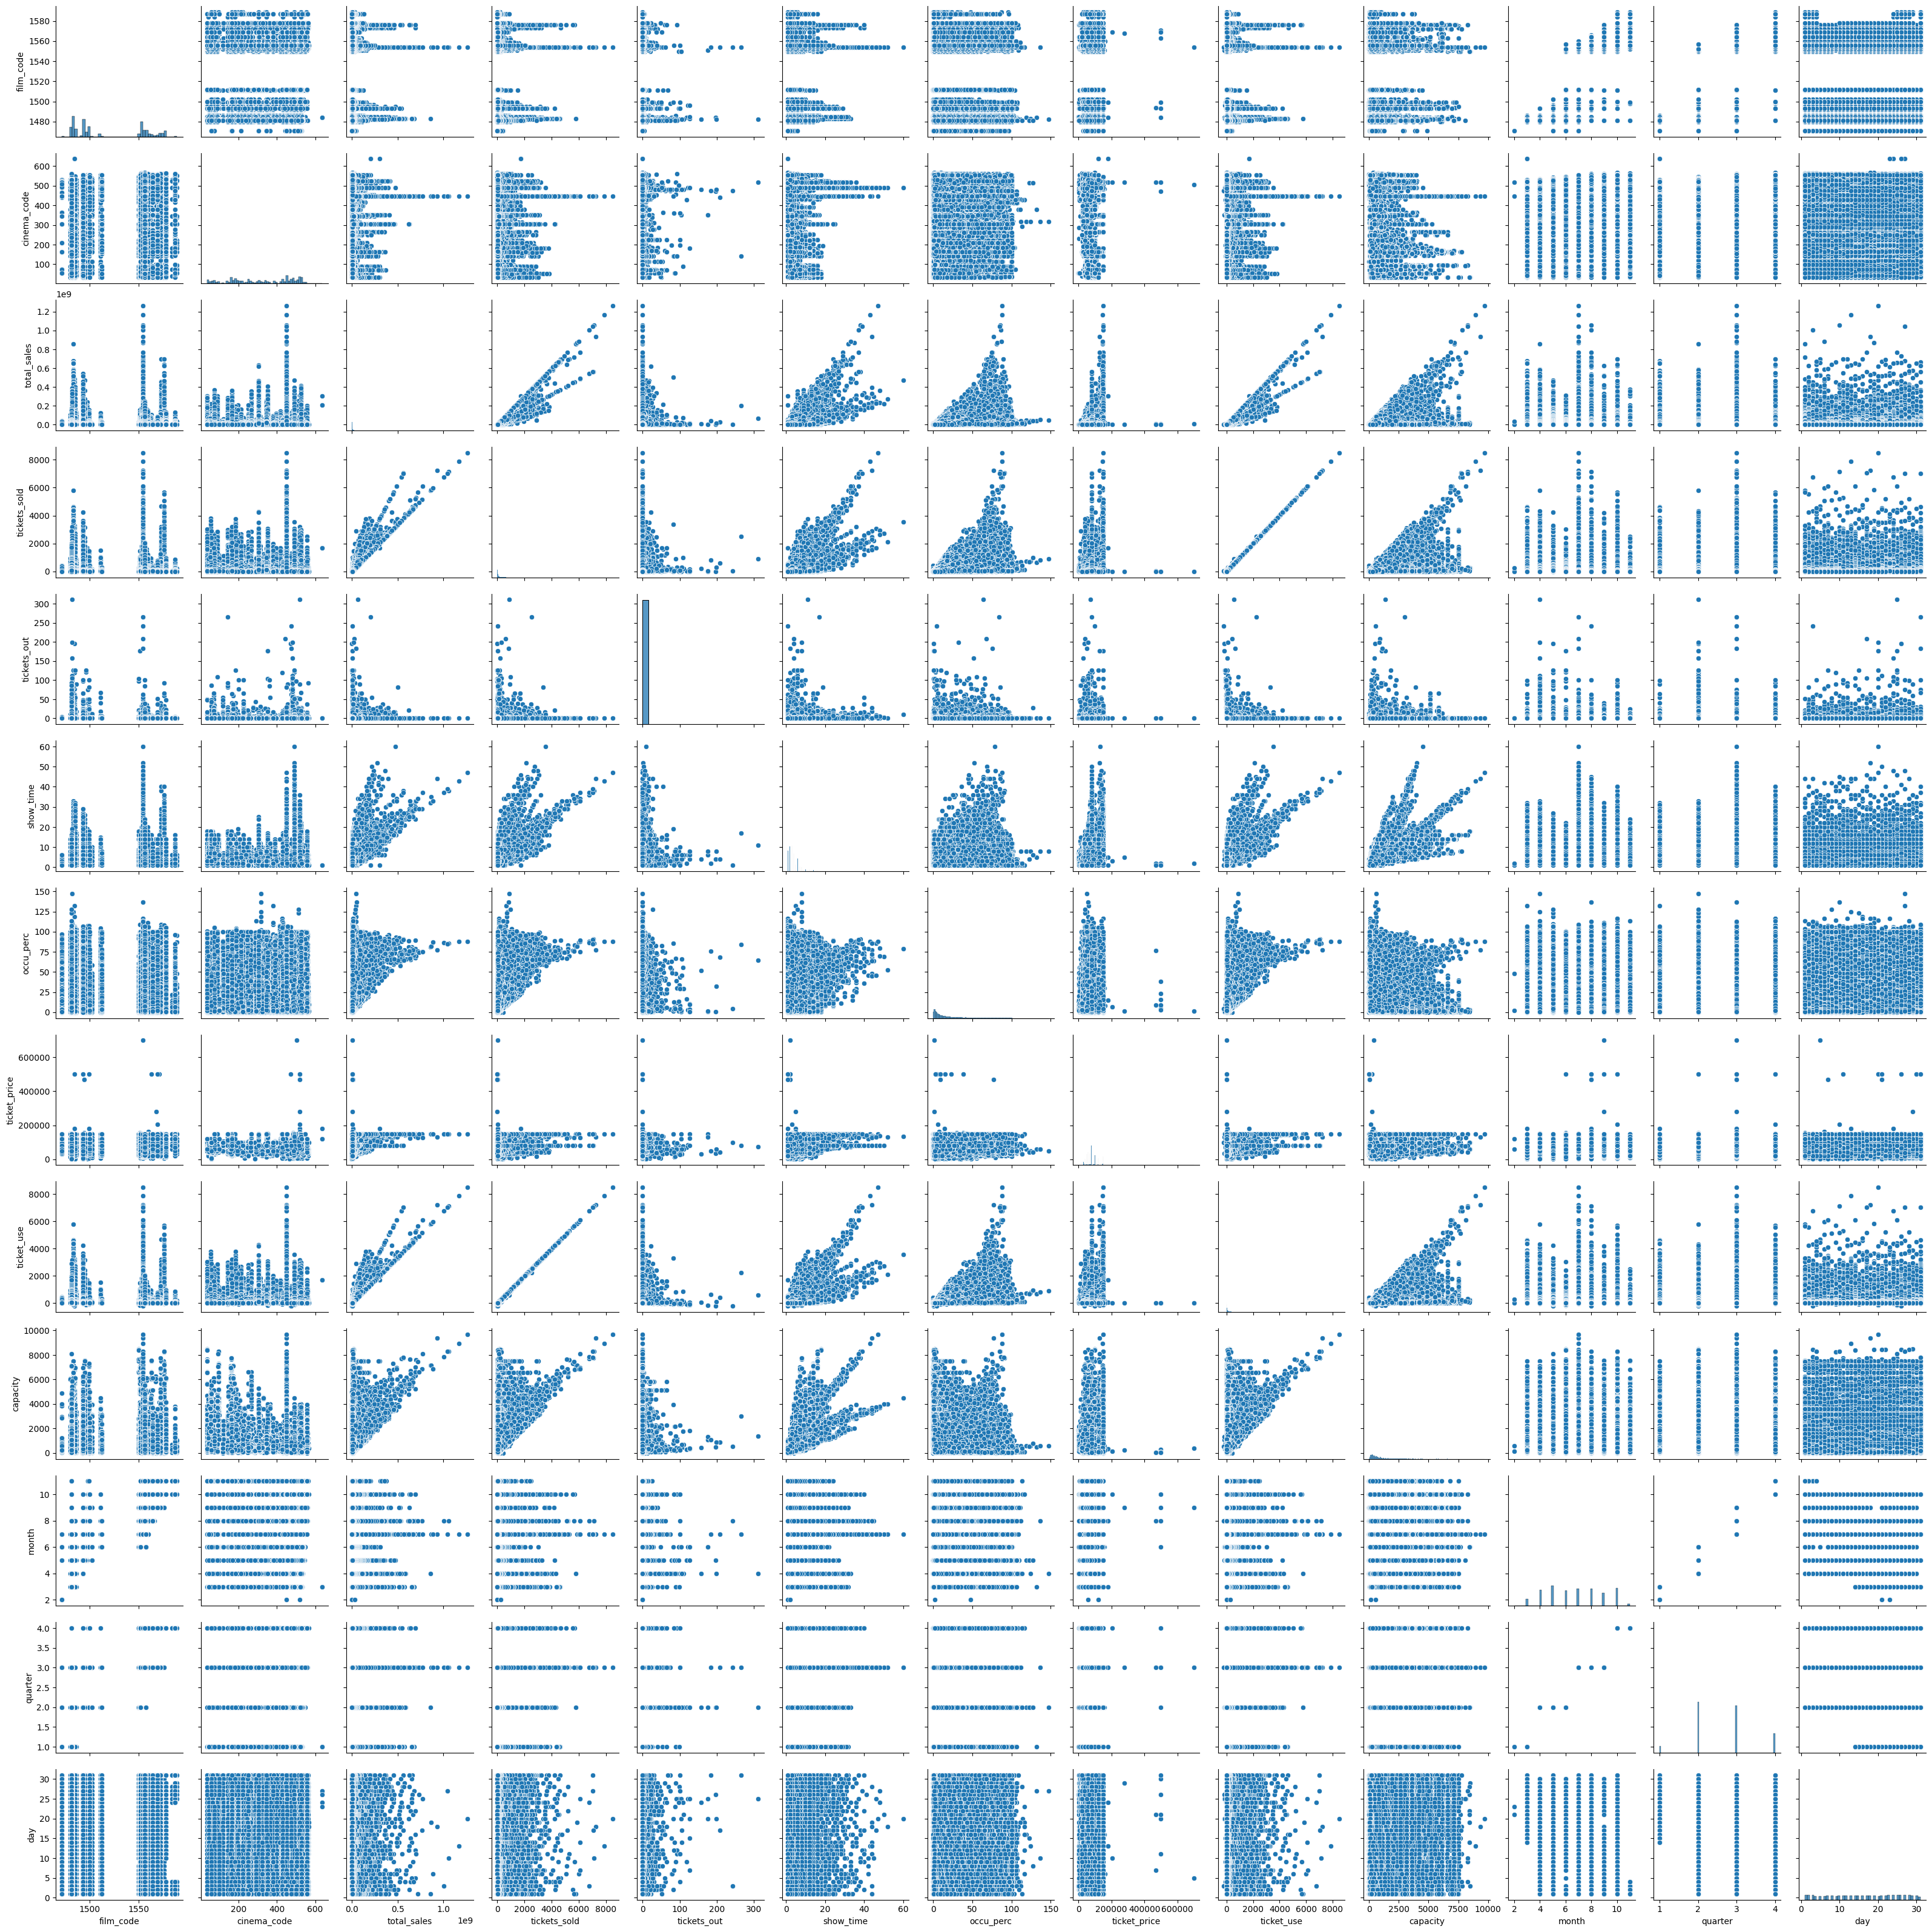

In [14]:
# Graphiques bivariés
sns.pairplot(df)
plt.show()

<Axes: >

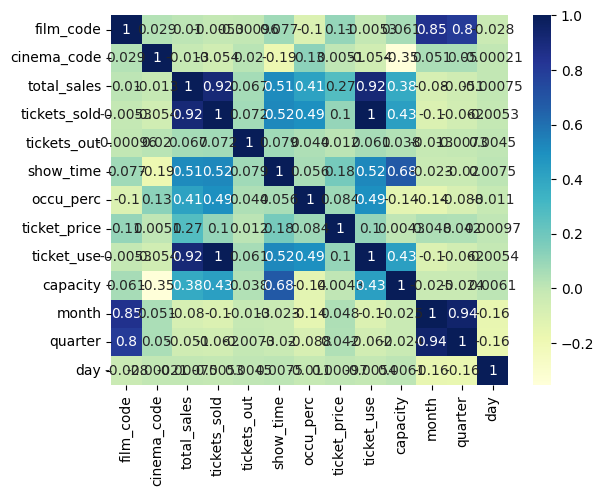

In [15]:
# Obtenir le tableau de corélation et la heatmap
dff=df.drop('date', axis=1)
            
corr_matrix = dff.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

In [16]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

#### On voit qu'il y a plusieurs valeurs manquantes dans les variables capacity et occu_perc. on va les supprimer, ils representes une miniscule partie de la dataset meme si on les supprime on ne va pas perdre d'informations

In [17]:
df.shape
df.dropna(inplace=True)
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [18]:
df.drop('date', axis=1, inplace=True)
df.shape

(142295, 13)

In [19]:
# Calculer la corrélation avec 'total_sales'
correlation_matrix = df.corr()
target_correlations = correlation_matrix['total_sales']
print(target_correlations)


film_code       0.010380
cinema_code    -0.013376
total_sales     1.000000
tickets_sold    0.915126
tickets_out     0.066949
show_time       0.510570
occu_perc       0.414309
ticket_price    0.271907
ticket_use      0.915062
capacity        0.376257
month          -0.079863
quarter        -0.050476
day            -0.000945
Name: total_sales, dtype: float64


Interpretations:

---

**Corrélation positive forte :**
- Les variables *"tickets_sold"* et *"ticket_use"* ont une forte corrélation positive avec *"total_sales"* (0.92 et 0.92 respectivement). Cela signifie que lorsque le nombre de billets vendus ou utilisés augmente, les ventes totales augmentent également.
- La variable *"show_time"* a également une corrélation positive forte (0.51). Cela suggère que plus le temps d'exposition d'un film est long, plus les ventes totales sont élevées.

**Corrélation positive modérée :**
- La variable *"occu_perc"* a une corrélation positive modérée (0.41). Cela indique que le taux d'occupation des salles de cinéma est lié positivement aux ventes totales.

**Corrélation positive faible à négligeable :**
- La variable *"ticket_price"* a une corrélation positive faible (0.27). Cela signifie que le prix des billets a une influence relativement faible sur les ventes totales.
- La variable *"capacity"* a également une corrélation positive faible (0.38).

**Corrélation négative :**
- La variable *"month"* a une corrélation négative légère (-0.08). Cela suggère que le mois de l'année peut avoir un effet minime sur les ventes totales.
- La variable *"quarter"* a une corrélation négative légère (-0.05).


In [20]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'month', 'quarter', 'day'],
      dtype='object')

In [21]:
X=df[['tickets_sold','show_time','occu_perc','ticket_price','ticket_use', 'capacity']]
y=df['total_sales']


In [22]:
X.describe()

tickets_sold      show_time      occu_perc   ticket_price  \
count  142295.000000  142295.000000  142295.000000  142295.000000   
mean      140.097944       3.933357      19.955645   81239.000455   
std       279.704392       3.056759      22.648393   33239.397517   
min         1.000000       1.000000       0.000000     483.870968   
25%        18.000000       2.000000       3.750000   60000.000000   
50%        50.000000       3.000000      10.340000   79448.266667   
75%       143.000000       5.000000      28.210000  100000.000000   
max      8499.000000      60.000000     147.500000  700000.000000   

          ticket_use       capacity  
count  142295.000000  142295.000000  
mean      139.860452     854.570014  
std       279.510181     952.940018  
min      -219.000000      -2.000000  
25%        18.000000     276.497696  
50%        50.000000     525.131283  
75%       143.000000    1038.961039  
max      8499.000000    9692.097160

In [23]:
scale=StandardScaler()
X_scaledd=scale.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaledd, y, test_size=0.3)

In [24]:
model_lr_cinema=LinearRegression()
model_lr_cinema.fit(X_train,y_train)

LinearRegression()

In [25]:
model_rf_cinema=RandomForestRegressor()
model_rf_cinema.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
# Entraînement du modèle de Support Vector Machines
svm_model_cinema = SVR()
model_svm=svm_model_cinema.fit(X_train, y_train)

In [27]:
# Make predictions on the test set for each model
y_pred_rf = model_rf_cinema.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_linear_reg = model_lr_cinema.predict(X_test)  

In [28]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_svm = r2_score(y_test, y_pred_svm)
r2_linear_reg = r2_score(y_pred_linear_reg, y_test,)

print("# R-squared score for each model")
print(f"R-squared Random Forest: {r2_rf:.7f}")
print(f"R-squared Support Vector Machines: {r2_svm:.7f}")
print(f"R-squared Linear Regression: {r2_linear_reg:.7f}")


# R-squared score for each model
R-squared Random Forest: 0.9966864
R-squared Support Vector Machines: -0.0762279
R-squared Linear Regression: 0.8511991


In [29]:
#Let's save the model
with open('model_cinema_regresssion_lineaire.pkl', 'wb') as f:
    pickle.dump(model_lr_cinema, f) 
print("Model enregistre")

Model enregistre


In [30]:
#Let's save the model
with open('model_cinema_ramdom_forest.pkl', 'wb') as f:
    pickle.dump(model_rf_cinema, f) 
print("Model enregistre")

Model enregistre


In [31]:
#Let's save the model
with open('model_cinema_regresssion_lineaire.pkl', 'wb') as f:
    pickle.dump(svm_model_cinema, f) 
print("Model enregistre")


Model enregistre


<img src="thank.png" width="900" height="500">


<img src="end.png" width="900" height="500">